# 目标检测模块MMDetection快速入门

## 1.简介

MMEdu的Detection模块主要功能是输出图片或视频中出现的多个对象名称，同时用方框框出对象所在方形区域。内置了常见的目标检测网络模型，有`FasterRCNN`、`YoLov3`、`ResNet50`和`SSD`等，并提供了预训练模型。

## 2.导入基础库

In [1]:
from base import *
from MMEdu import MMDetection as det

## 3.模型推理

我们提供了常见模型的预训练模型，借助预训练模型就能体验AI的推理过程。

#### 第一步、实例化模型

`MMDetection`推荐的网络模型是`FasterRCNN`，是目前最常用的目标检测算法之一。

In [2]:
model = det('FasterRCNN')

#### 第二步、指定模型保存的路径

训练好的模型包含两个文件，一个是权重文件，扩展名是.pth，另一个是分类标签信息文件，用来指定训练集的路径，代表训练集中所包含的所有类别，扩展名是.txt。

可能有同学会疑惑：为什么需要指定分类标签信息文件？是因为目标检测任务涉及了图片分类的环节，可从`MMDetection`的功能判断。

In [3]:
checkpoint = '../checkpoints/det_model/plate/latest.pth'
class_path = '../dataset/det/coco/classes.txt'

#### 第三步、指定图片，开始推理

我们提供的`FasterRCNN`预训练模型是基于车牌数据集训练的，你可以找几张有车牌的图片，让AI“检测”一下。

`show`代表是否需要显示结果图片，设置为`True`表示推理后显示推理结果图。

在进行`inference`推理之后我们可以使用`model.print_result()`函数进行输出，通常来说我们会在输出结果里阐述各个数据代表的意义，同时也会将输出内容进行中文化处理，方便更多的受众群体能够理解人工智能推理所带来的结果数据。

========= begin inference ==========
load checkpoint from local path: ../checkpoints/det_model/plate/latest.pth


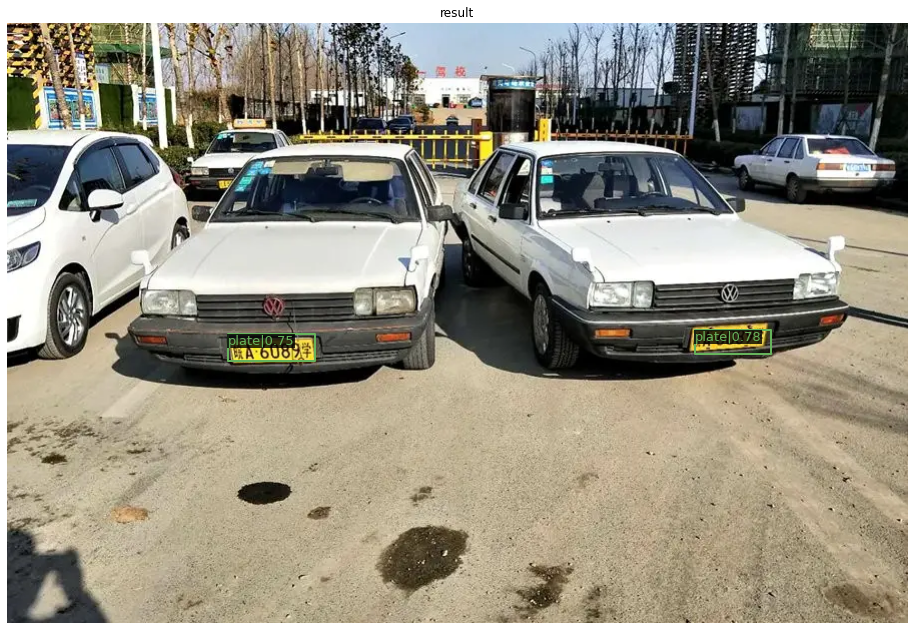

========= finish inference ==========
检测结果如下：
[{'置信度': 0.78281254, '坐标': {'x': 687, 'y': 307, 'w': 763, 'h': 331}}, {'置信度': 0.75332475, '坐标': {'x': 220, 'y': 311, 'w': 307, 'h': 338}}, {'置信度': 0.11480006, '坐标': {'x': 842, 'y': 148, 'w': 866, 'h': 159}}, {'置信度': 0.11355357, '坐标': {'x': 841, 'y': 142, 'w': 864, 'h': 153}}, {'置信度': 0.099919856, '坐标': {'x': 206, 'y': 152, 'w': 232, 'h': 165}}, {'置信度': 0.08576747, '坐标': {'x': 830, 'y': 150, 'w': 855, 'h': 162}}, {'置信度': 0.0842109, '坐标': {'x': 193, 'y': 146, 'w': 217, 'h': 159}}, {'置信度': 0.08263848, '坐标': {'x': 216, 'y': 146, 'w': 240, 'h': 159}}, {'置信度': 0.07153446, '坐标': {'x': 826, 'y': 141, 'w': 849, 'h': 152}}, {'置信度': 0.06341974, '坐标': {'x': 187, 'y': 152, 'w': 211, 'h': 166}}, {'置信度': 0.054788847, '坐标': {'x': 835, 'y': 137, 'w': 853, 'h': 149}}, {'置信度': 0.050312724, '坐标': {'x': 816, 'y': 153, 'w': 841, 'h': 164}}]


[{'置信度': 0.78281254, '坐标': {'x': 687, 'y': 307, 'w': 763, 'h': 331}},
 {'置信度': 0.75332475, '坐标': {'x': 220, 'y': 311, 'w': 307, 'h': 338}},
 {'置信度': 0.11480006, '坐标': {'x': 842, 'y': 148, 'w': 866, 'h': 159}},
 {'置信度': 0.11355357, '坐标': {'x': 841, 'y': 142, 'w': 864, 'h': 153}},
 {'置信度': 0.099919856, '坐标': {'x': 206, 'y': 152, 'w': 232, 'h': 165}},
 {'置信度': 0.08576747, '坐标': {'x': 830, 'y': 150, 'w': 855, 'h': 162}},
 {'置信度': 0.0842109, '坐标': {'x': 193, 'y': 146, 'w': 217, 'h': 159}},
 {'置信度': 0.08263848, '坐标': {'x': 216, 'y': 146, 'w': 240, 'h': 159}},
 {'置信度': 0.07153446, '坐标': {'x': 826, 'y': 141, 'w': 849, 'h': 152}},
 {'置信度': 0.06341974, '坐标': {'x': 187, 'y': 152, 'w': 211, 'h': 166}},
 {'置信度': 0.054788847, '坐标': {'x': 835, 'y': 137, 'w': 853, 'h': 149}},
 {'置信度': 0.050312724, '坐标': {'x': 816, 'y': 153, 'w': 841, 'h': 164}}]

In [4]:
img ='car_plate.png'
result = model.inference(image=img, show=True, class_path=class_path,checkpoint = checkpoint)
model.print_result(result)

同时您会发现当前目录下出现了一个新的文件夹“det_result”，里面放着这张图片的推理结果图，名称为原本的图片文件名称，下次推理的结果图也会放到这个文件夹。可以得到这个文件夹下查看。

返回的数据类型是返回的数据类型是一个字典列表（很多个字典组成的列表）类型的变量，内置的字典表示对应类别物体的检测结果，如“`{'置信度': 0.78281254, '坐标': {'x': 687, 'y': 307, 'w': 763, 'h': 331}}`”。多个字典表示检测出来的多个车牌，按照置信度大小排列，最后会框出置信度较大的车牌，如推理结果图所示。

我们可以用字典访问其中的元素。

In [13]:
x = model.print_result(result)
print('最大置信度为：',x[0]['置信度'])
print('检测框坐标：',x[0]['坐标'])

检测结果如下：
[{'置信度': 0.78281254, '坐标': {'x': 687, 'y': 307, 'w': 763, 'h': 331}}, {'置信度': 0.75332475, '坐标': {'x': 220, 'y': 311, 'w': 307, 'h': 338}}, {'置信度': 0.11480006, '坐标': {'x': 842, 'y': 148, 'w': 866, 'h': 159}}, {'置信度': 0.11355357, '坐标': {'x': 841, 'y': 142, 'w': 864, 'h': 153}}, {'置信度': 0.099919856, '坐标': {'x': 206, 'y': 152, 'w': 232, 'h': 165}}, {'置信度': 0.08576747, '坐标': {'x': 830, 'y': 150, 'w': 855, 'h': 162}}, {'置信度': 0.0842109, '坐标': {'x': 193, 'y': 146, 'w': 217, 'h': 159}}, {'置信度': 0.08263848, '坐标': {'x': 216, 'y': 146, 'w': 240, 'h': 159}}, {'置信度': 0.07153446, '坐标': {'x': 826, 'y': 141, 'w': 849, 'h': 152}}, {'置信度': 0.06341974, '坐标': {'x': 187, 'y': 152, 'w': 211, 'h': 166}}, {'置信度': 0.054788847, '坐标': {'x': 835, 'y': 137, 'w': 853, 'h': 149}}, {'置信度': 0.050312724, '坐标': {'x': 816, 'y': 153, 'w': 841, 'h': 164}}]
最大置信度为： 0.78281254
检测框坐标： {'x': 687, 'y': 307, 'w': 763, 'h': 331}


可能有同学会有疑惑：是怎么筛选出置信度较大的车牌呢？其实和两个参数的默认设置有关，分别是“`rpn_threshold=0.7`”和“`rcnn_threshold=0.7`”，这两个参数分别表示FasterRCNN模型目标检测两个阶段对于检测框的保留程度，高于这个数值的框将会被保留（如果设置过低，也可能会发现图中出现了多个框）。感兴趣的同学可以了解一下。

#### 第四步：指定一组图片，开始推理
您也可以将收集的图片放在一个文件夹下，然后指定文件夹路径进行一组图片的批量推理。如在demo文件夹下新建一个det_testIMG文件夹放图片，运行下面这段代码。

In [11]:
img = 'det_testIMG/'
model = det('FasterRCNN')
checkpoint = '../checkpoints/det_model/plate/latest.pth'
class_path = '../dataset/det/coco/classes.txt'
result = model.inference(image=img, show=True, class_path=class_path, checkpoint = checkpoint)
model.print_result(result)

========= begin inference ==========
load checkpoint from local path: ../checkpoints/det_model/plate/latest.pth


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.42s/it]

========= finish inference ==========
检测结果如下：
[[{'置信度': 0.8919026, '坐标': {'x': 209, 'y': 379, 'w': 569, 'h': 483}}], [{'置信度': 0.9301931, '坐标': {'x': 284, 'y': 410, 'w': 453, 'h': 469}}, {'置信度': 0.1704509, '坐标': {'x': 513, 'y': 73, 'w': 534, 'h': 86}}, {'置信度': 0.13631739, '坐标': {'x': 528, 'y': 73, 'w': 550, 'h': 86}}, {'置信度': 0.13005382, '坐标': {'x': 520, 'y': 80, 'w': 541, 'h': 93}}, {'置信度': 0.112433314, '坐标': {'x': 517, 'y': 67, 'w': 536, 'h': 109}}, {'置信度': 0.11071536, '坐标': {'x': 517, 'y': 62, 'w': 539, 'h': 76}}, {'置信度': 0.11041218, '坐标': {'x': 532, 'y': 66, 'w': 554, 'h': 80}}, {'置信度': 0.11033154, '坐标': {'x': 552, 'y': 72, 'w': 574, 'h': 86}}, {'置信度': 0.09754456, '坐标': {'x': 556, 'y': 65, 'w': 577, 'h': 79}}, {'置信度': 0.09627898, '坐标': {'x': 541, 'y': 69, 'w': 564, 'h': 83}}, {'置信度': 0.09207892, '坐标': {'x': 508, 'y': 68, 'w': 529, 'h': 81}}, {'置信度': 0.090184115, '坐标': {'x': 510, 'y': 83, 'w': 532, 'h': 95}}, {'置信度': 0.08755188, '坐标': {'x': 541, 'y': 62, 'w': 563, 'h': 75}}, {'置信度': 

[[{'置信度': 0.8919026, '坐标': {'x': 209, 'y': 379, 'w': 569, 'h': 483}}],
 [{'置信度': 0.9301931, '坐标': {'x': 284, 'y': 410, 'w': 453, 'h': 469}},
  {'置信度': 0.1704509, '坐标': {'x': 513, 'y': 73, 'w': 534, 'h': 86}},
  {'置信度': 0.13631739, '坐标': {'x': 528, 'y': 73, 'w': 550, 'h': 86}},
  {'置信度': 0.13005382, '坐标': {'x': 520, 'y': 80, 'w': 541, 'h': 93}},
  {'置信度': 0.112433314, '坐标': {'x': 517, 'y': 67, 'w': 536, 'h': 109}},
  {'置信度': 0.11071536, '坐标': {'x': 517, 'y': 62, 'w': 539, 'h': 76}},
  {'置信度': 0.11041218, '坐标': {'x': 532, 'y': 66, 'w': 554, 'h': 80}},
  {'置信度': 0.11033154, '坐标': {'x': 552, 'y': 72, 'w': 574, 'h': 86}},
  {'置信度': 0.09754456, '坐标': {'x': 556, 'y': 65, 'w': 577, 'h': 79}},
  {'置信度': 0.09627898, '坐标': {'x': 541, 'y': 69, 'w': 564, 'h': 83}},
  {'置信度': 0.09207892, '坐标': {'x': 508, 'y': 68, 'w': 529, 'h': 81}},
  {'置信度': 0.090184115, '坐标': {'x': 510, 'y': 83, 'w': 532, 'h': 95}},
  {'置信度': 0.08755188, '坐标': {'x': 541, 'y': 62, 'w': 563, 'h': 75}},
  {'置信度': 0.086926855, '坐标': 

同时您会发现当前目录下“det_result”文件夹里出现了这组图片的推理结果图，名称均为原本的图片文件名称。可以得到这个文件夹下查看。

## 4.模型训练

### 4.1 基于预训练模型继续训练

全新开始训练一个模型，一般要花较长时间。如果使用CPU训练，需要的时间就更长了。因此我们强烈建议在预训练模型的基础上继续训练。

- 注：如果想使用GPU环境加速训练，您可以参考我们的环境配置文档来配置环境（需要您的设备有支持CUDA加速的GPU）。

#### 第一步、实例化模型

In [2]:
model = det('FasterRCNN')

#### 第二步、配置基本信息

同图片分类，目标检测模型训练至少需要提供四大基本信息：图片分类的类别数量（`model.num_classes`），新模型保存的路径（`model.save_fold`），数据集的路径（`model.load_dataset`）和预训练模型的权重文件（`checkpoint`）。

我们进行车牌检测，此时只有一个类别。

`MMEdu`根目录下的`dataset`文件夹下保存了各个任务的数据集，请大家在这个文件夹中找，`coco`在`det`文件夹下，包含两个文件夹，`annotations`文件夹存储`json`格式标注文件，`images`文件夹存储用于训练、验证、测试的图片。在我们的文档中有关于数据集格式的介绍。

MMEdu根目录下的`checkpoints`文件夹，保存了很多网络的预训练模型，请大家在这个文件夹中找，在我们的文档中有关于预训练权重的介绍。

In [3]:
model.num_classes = 1
model.load_dataset(path='../dataset/det/coco')
model.save_fold = '../checkpoints/det_model/plate_continue'
checkpoint = '../checkpoints/det_model/plate/latest.pth'

#### 第三步、开始继续训练

`epochs`指训练的轮次。机器学习的训练是一个反复的过程，一般来说，需要经历一定轮次才能达到较好的效果。你可以先改一个小数字，如1。看一下训练一轮需要多少时间，然后再次执行这行命令。

`validate=True`表示每轮（每个epoch）训练后，在验证集（val_set）上测试一次准确率。


In [7]:
model.train(epochs=3, checkpoint=checkpoint, validate=True)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load checkpoint from local path: ../checkpoints/det_model/plate/latest.pth


2022-05-29 17:27:56,020 - mmdet - INFO - Start running, host: luyanan@SHAI14000521W, work_dir: D:\教师培训课程\测试包\Project0.6.2\Project\checkpoints\det_model\plate
2022-05-29 17:27:56,021 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) NumClassCheckHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook                           
 -------------------- 
after_train_iter:
(ABO

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2022-05-29 17:39:26,219 - mmdet - INFO - Epoch [1][50/150]	lr: 9.890e-05, eta: 1:32:01, time: 13.804, data_time: 0.189, loss_rpn_cls: 0.0025, loss_rpn_bbox: 0.0043, loss_cls: 0.0126, acc: 99.5195, loss_bbox: 0.0185, loss: 0.0378
2022-05-29 17:50:47,613 - mmdet - INFO - Epoch [1][100/150]	lr: 1.988e-04, eta: 1:20:00, time: 13.628, data_time: 0.003, loss_rpn_cls: 0.0030, loss_rpn_bbox: 0.0054, loss_cls: 0.0139, acc: 99.5039, loss_bbox: 0.0188, loss: 0.0411
2022-05-29 18:02:37,907 - mmdet - INFO - Epoch [1][150/150]	lr: 2.987e-04, eta: 1:09:23, time: 14.206, data_time: 0.003, loss_rpn_cls: 0.0027, loss_rpn_bbox: 0.0069, loss_cls: 0.0147, acc: 99.4258, loss_bbox: 0.0207, loss: 0.0450
2022-05-29 18:02:38,640 - mmdet - INFO - Saving checkpoint at 1 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 0.1 task/s, elapsed: 26s, ETA:     0s

2022-05-29 18:03:06,834 - mmdet - INFO - Evaluating bbox...
2022-05-29 18:03:06,859 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.699
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.663
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.800
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.500
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.800
 Average

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).


2022-05-29 18:03:08,193 - mmdet - INFO - Now best checkpoint is saved as best_bbox_mAP_epoch_1.pth.
2022-05-29 18:03:08,194 - mmdet - INFO - Best bbox_mAP is 0.6990 at 1 epoch.
2022-05-29 18:03:08,195 - mmdet - INFO - Epoch(val) [1][3]	bbox_mAP: 0.6990, bbox_mAP_50: 1.0000, bbox_mAP_75: 0.6630, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.8000, bbox_mAP_l: 0.5000, bbox_mAP_copypaste: 0.699 1.000 0.663 -1.000 0.800 0.500
2022-05-29 18:15:36,109 - mmdet - INFO - Epoch [2][50/150]	lr: 3.986e-04, eta: 0:58:57, time: 14.958, data_time: 0.208, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0072, loss_cls: 0.0166, acc: 99.4219, loss_bbox: 0.0247, loss: 0.0512
2022-05-29 18:26:41,626 - mmdet - INFO - Epoch [2][100/150]	lr: 4.985e-04, eta: 0:46:36, time: 13.310, data_time: 0.003, loss_rpn_cls: 0.0024, loss_rpn_bbox: 0.0060, loss_cls: 0.0131, acc: 99.5156, loss_bbox: 0.0215, loss: 0.0431
2022-05-29 18:38:31,723 - mmdet - INFO - Epoch [2][150/150]	lr: 5.984e-04, eta: 0:35:02, time: 14.202, data_time: 0.003, loss_r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 0.1 task/s, elapsed: 31s, ETA:     0s

2022-05-29 18:39:04,664 - mmdet - INFO - Evaluating bbox...
2022-05-29 18:39:04,676 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.450
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.442
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.650
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.650
 Average

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).


2022-05-29 18:50:29,895 - mmdet - INFO - Epoch [3][50/150]	lr: 6.983e-04, eta: 0:23:17, time: 13.704, data_time: 0.216, loss_rpn_cls: 0.0021, loss_rpn_bbox: 0.0062, loss_cls: 0.0134, acc: 99.4922, loss_bbox: 0.0209, loss: 0.0426
2022-05-29 19:01:23,737 - mmdet - INFO - Epoch [3][100/150]	lr: 7.982e-04, eta: 0:11:33, time: 13.077, data_time: 0.003, loss_rpn_cls: 0.0039, loss_rpn_bbox: 0.0096, loss_cls: 0.0184, acc: 99.3086, loss_bbox: 0.0274, loss: 0.0593
2022-05-29 19:12:19,748 - mmdet - INFO - Epoch [3][150/150]	lr: 8.981e-04, eta: 0:00:00, time: 13.120, data_time: 0.003, loss_rpn_cls: 0.0033, loss_rpn_bbox: 0.0079, loss_cls: 0.0176, acc: 99.3516, loss_bbox: 0.0212, loss: 0.0500
2022-05-29 19:12:20,127 - mmdet - INFO - Saving checkpoint at 3 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 0.1 task/s, elapsed: 29s, ETA:     0s

2022-05-29 19:12:50,664 - mmdet - INFO - Evaluating bbox...
2022-05-29 19:12:50,675 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.645
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.554
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.750
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.500
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.667
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.667
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.667
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.750
 Average

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).


此时在`model.save_fold`指定的`checkpoints\det_model`文件夹中我们会发现多了两种文件，一种是`***.log.json`日志文件，它记录了我们模型在训练过程中的一些参数，比如说学习率`lr`，所用时间`time`，损失`loss`，以及准确率`acc`等；另一种文件是.pth文件，这个是我们在训练过程中所保存的模型权重文件，分为按照训练轮次生成的权重文件`epoch_x.pth`和一个`best_bbox_mAP`权重文件，`best_bbox_mAP`权重文件即目前为止准确率最高的权重。

我们可以根据`loss`和`acc`判断训练效果是否达到预期，如果达到预期可以停止训练，如果准确率降低应该提前停止训练，防止过拟合。就可以使用`best_bbox_mAP`权重文件来进行推理。

*过拟合（Overfitting）是值太过贴近训练数据的特征，在训练集上表现得非常优秀。近乎完美地预测或区分了所有数据，但是在新的测试集上却表现平平，不具泛化性，拿到新样本后没有办法去准确地判断。

### 4.2 从零开始训练新模型

当然，你也可以从零开始，训练一个新的模型。具体代码和4.1几乎一致。

#### 第一步、实例化模型

In [4]:
model = det('FasterRCNN')

需要说明的是，`MMDetection`模块内置了好几个SOTA模型，如`FasterRCNN`、`YoLov3`等。其中`FasterRCNN`是目标检测模型中最好的选择之一。`YoLo`系列也是一种经典的目标检测模型，相较`FasterRCNN`模型，结构简单且推理速度快，精确度略低，是一种兼顾速度与准确率的算法。要根据不同的需求，选择不同的网络模型。

#### 第二步、配置基本信息

基本信息有三类，分别是：图片分类的类别数量（`model.num_classes`），模型保存的路径（`model.save_fold`）和数据集的路径（`model.load_dataset`）。

至于使用什么数据集，看你要解决什么问题，检测什么图片了。你可以在网上下载一些公开的目标检测数据集，也可以自己制作数据集，就是不断收集图片啦。`MMEdu`的`MMDection`支持的数据集类型是`COCO`，你要按照`COCO格式`来建立，具体步骤请参考本教程的第`5`点。

In [5]:
model.num_classes = 1
model.load_dataset(path='../dataset/det/coco')
model.save_fold = '../checkpoints/det_model/plate_new'

#### 第三步、开始训练模型

同样，你也可以先把epochs改小一点，比如3。训练3轮后测试一下，效果不好再继续训练。训练的速度受CPU或者GPU的速度决定，一般来说CPU训练速度较慢，如果你的数据集图片比较多，又是全新训练的，一般都需要100多轮才会有较好的表现，你要有心理准备哦。

In [6]:
model.train(epochs=3, validate=True, Frozen_stages=1)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2022-05-30 15:44:04,005 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2022-05-30 15:44:04,006 - mmcv - INFO - load model from: torchvision://resnet50
2022-05-30 15:44:04,007 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2022-05-30 15:44:04,223 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2022-05-30 15:44:04,258 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2022-05-30 15:44:04,280 - mmcv - INFO - initialize RPNHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01}
2022-05-30 15:44:04,287 - mmcv - INFO - initialize Shared2FCBBoxHead with init_cfg [{'type': 'Normal', 'std': 0.01, 'override': {'name': 'fc_cls'}}, {'type': 'Normal', 'std': 0.001, 'override': {'name': 'fc_reg'}}, {'type': 'Xavier', 'distribution': 'uniform', 'override'

2022-05-30 15:44:04,433 - mmcv - INFO - 
backbone.layer2.1.bn2.weight - torch.Size([128]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-05-30 15:44:04,434 - mmcv - INFO - 
backbone.layer2.1.bn2.bias - torch.Size([128]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-05-30 15:44:04,435 - mmcv - INFO - 
backbone.layer2.1.conv3.weight - torch.Size([512, 128, 1, 1]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-05-30 15:44:04,436 - mmcv - INFO - 
backbone.layer2.1.bn3.weight - torch.Size([512]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-05-30 15:44:04,436 - mmcv - INFO - 
backbone.layer2.1.bn3.bias - torch.Size([512]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-05-30 15:44:04,437 - mmcv - INFO - 
backbone.layer2.2.conv1.weight - torch.Size([128, 512, 1, 1]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-05-30 15:44:04,437 - mmcv - INFO - 
backbone.layer2.2.bn1.weight - torch.Size([128]): 
PretrainedInit: load f

2022-05-30 15:44:04,470 - mmcv - INFO - 
backbone.layer3.3.conv2.weight - torch.Size([256, 256, 3, 3]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-05-30 15:44:04,471 - mmcv - INFO - 
backbone.layer3.3.bn2.weight - torch.Size([256]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-05-30 15:44:04,471 - mmcv - INFO - 
backbone.layer3.3.bn2.bias - torch.Size([256]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-05-30 15:44:04,472 - mmcv - INFO - 
backbone.layer3.3.conv3.weight - torch.Size([1024, 256, 1, 1]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-05-30 15:44:04,472 - mmcv - INFO - 
backbone.layer3.3.bn3.weight - torch.Size([1024]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-05-30 15:44:04,473 - mmcv - INFO - 
backbone.layer3.3.bn3.bias - torch.Size([1024]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-05-30 15:44:04,473 - mmcv - INFO - 
backbone.layer3.4.conv1.weight - torch.Size([256, 1024, 1, 1]): 
Pretr

2022-05-30 15:44:04,512 - mmcv - INFO - 
neck.lateral_convs.1.conv.weight - torch.Size([256, 512, 1, 1]): 
XavierInit: gain=1, distribution=uniform, bias=0 
 
2022-05-30 15:44:04,512 - mmcv - INFO - 
neck.lateral_convs.1.conv.bias - torch.Size([256]): 
The value is the same before and after calling `init_weights` of FasterRCNN  
 
2022-05-30 15:44:04,513 - mmcv - INFO - 
neck.lateral_convs.2.conv.weight - torch.Size([256, 1024, 1, 1]): 
XavierInit: gain=1, distribution=uniform, bias=0 
 
2022-05-30 15:44:04,513 - mmcv - INFO - 
neck.lateral_convs.2.conv.bias - torch.Size([256]): 
The value is the same before and after calling `init_weights` of FasterRCNN  
 
2022-05-30 15:44:04,514 - mmcv - INFO - 
neck.lateral_convs.3.conv.weight - torch.Size([256, 2048, 1, 1]): 
XavierInit: gain=1, distribution=uniform, bias=0 
 
2022-05-30 15:44:04,514 - mmcv - INFO - 
neck.lateral_convs.3.conv.bias - torch.Size([256]): 
The value is the same before and after calling `init_weights` of FasterRCNN  
 

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2022-05-30 15:55:32,356 - mmdet - INFO - Epoch [1][50/150]	lr: 9.890e-05, eta: 1:31:42, time: 13.756, data_time: 0.176, loss_rpn_cls: 0.6882, loss_rpn_bbox: 0.0164, loss_cls: 0.3109, acc: 89.2891, loss_bbox: 0.0026, loss: 1.0181
2022-05-30 16:07:54,738 - mmdet - INFO - Epoch [1][100/150]	lr: 1.988e-04, eta: 1:23:25, time: 14.848, data_time: 0.003, loss_rpn_cls: 0.6082, loss_rpn_bbox: 0.0151, loss_cls: 0.0550, acc: 99.6367, loss_bbox: 0.0030, loss: 0.6813
2022-05-30 16:26:54,815 - mmdet - INFO - Epoch [1][150/150]	lr: 2.987e-04, eta: 1:25:40, time: 22.802, data_time: 0.004, loss_rpn_cls: 0.1666, loss_rpn_bbox: 0.0180, loss_cls: 0.0599, acc: 99.5078, loss_bbox: 0.0097, loss: 0.2541
2022-05-30 16:26:55,814 - mmdet - INFO - Saving checkpoint at 1 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 0.1 task/s, elapsed: 49s, ETA:     0s

2022-05-30 16:27:47,833 - mmdet - INFO - Evaluating bbox...
2022-05-30 16:27:47,838 - mmdet - ERROR - The testing results of the whole dataset is empty.


Loading and preparing results...


TypeError: '>' not supported between instances of 'NoneType' and 'float'

同样的，可以查看`model.save_fold`指定的文件夹中的日志文件和权重文件，可以根据`loss`和`acc`判断训练效果是否达到预期，如果达到预期可以停止训练，如果准确率降低应该提前停止训练，防止过拟合。

## 5.制作一个自己的数据集
我们已经掌握了AI训练的流程，现在你一定想知道怎么改变数据集训练自己的图片，解决检测问题吧？其中的关键点在于制作数据集。提供两种方式，一种是如何将已有数据集整理为COCO格式，详见5.3，第二种是如何自己做新数据集，详见5.4。

### 5.1 MMEdu提供了哪些数据集
MMEdu系列提供了包括分类和检测任务的若干数据集，存储在`dataset`文件夹下。下面主要介绍检测（`det`）数据集。
- coco

包含两个文件夹，`annotations`文件夹存储`json`格式标注文件，`images`文件夹存储用于训练、验证、测试的图片。

具体的COCO格式介绍详见[MMEdu的数据集格式详解](https://mmedu.readthedocs.io/zh/latest/%E8%BF%9B%E9%98%B6%E6%95%99%E7%A8%8B/MMEdu%E7%9A%84%E6%95%B0%E6%8D%AE%E9%9B%86%E6%A0%BC%E5%BC%8F%E8%AF%A6%E8%A7%A3.html)


### 5.2 可以下载数据集的地方
- [OpenMMLab数据集资源库](https://openmmlab.com/dataset)
- [MMEdu教育团队数据集资源库](https://p6bm2if73b.feishu.cn/drive/folder/fldcnfDtXSQx0PDuUGLWZlnVO3g)
- [Kaggle](https://www.kaggle.com/datasets)
- [飞桨AI Studio](https://aistudio.baidu.com/aistudio/datasetoverview)

### 5.3 如何将已有数据集整理为COCO格式
#### 第一步、下载数据集
我下载了一个可用于目标检测的balloon数据集，它分为测试集和验证集，每个文件夹包含了图片和一个`json`文件。

#### 第二步、将标注文件转换为COCO标注格式

可以用代码将下载的数据集标注文件转换为`COCO`标注格式，首先需要查看balloon数据集的标注文件，以下代码可将balloon数据集的标注文件进行转换。

In [14]:
import os.path as osp
import mmcv

def convert_balloon_to_coco(ann_file, out_file, image_prefix):
    data_infos = mmcv.load(ann_file)

    annotations = []
    images = []
    obj_count = 0

    for idx, v in enumerate(mmcv.track_iter_progress(data_infos.values())):
        filename = v['filename']
        img_path = osp.join(image_prefix, filename)
        height, width = mmcv.imread(img_path).shape[:2]

        images.append(dict(
            id=idx,
            file_name=filename,
            height=height,
            width=width))

        bboxes = []
        labels = []
        masks = []
        for _, obj in v['regions'].items():
            assert not obj['region_attributes']
            obj = obj['shape_attributes']
            px = obj['all_points_x']
            py = obj['all_points_y']
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            x_min, y_min, x_max, y_max = (
                min(px), min(py), max(px), max(py))

            data_anno = dict(
                image_id=idx,
                id=obj_count,
                category_id=0,
                bbox=[x_min, y_min, x_max - x_min, y_max - y_min],
                area=(x_max - x_min) * (y_max - y_min),
                segmentation=[poly],
                iscrowd=0)

            annotations.append(data_anno)
            obj_count += 1
    coco_format_json = dict(
        images=images,
        annotations=annotations,
        categories=[{'id': 0, 'name': 'balloon'}]
    )
    mmcv.dump(coco_format_json, out_file)


# 对验证集数据进行处理是，将下面路径中的train 替换成val 即可
# 注意数据集 balloon 的路径自行调整
ann_file = 'D:\测试数据集\\balloon_dataset\\balloon\\train/via_region_data.json'
out_file = 'D:\测试数据集\\balloon_dataset\\balloon\\train/train.json'
image_prefix = 'D:\测试数据集\\balloon_dataset\\balloon\\train'
convert_balloon_to_coco(ann_file, out_file, image_prefix)
ann_file = 'D:\测试数据集\\balloon_dataset\\balloon\\val/via_region_data.json'
out_file = 'D:\测试数据集\\balloon_dataset\\balloon\\val/valid.json'
image_prefix = 'D:\测试数据集\\balloon_dataset\\balloon\\val'
convert_balloon_to_coco(ann_file, out_file, image_prefix)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 61/61, 20.6 task/s, elapsed: 3s, ETA:     0s
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 13/13, 18.8 task/s, elapsed: 1s, ETA:     0s


#### 第三步、按照目录结构整理文件
按照要求的目录结构，将json文件放入`annotations`文件夹，将训练集图片和验证集图片放入`images`文件夹，最后将文件夹重新命名，在训练的时候，只要通过`model.load_dataset`指定数据集的路径就可以了。

### 5.4 如何自己做新数据集
#### 第一步、创建文件夹
我们需要创建两个文件夹`images`和`annotations`，分别用于存放图片以及标注信息，图片可按照自己喜欢的方式收集，图片中包含需要检测的信息即可。
#### 第二步、标注图片
可以使用LabelMe批量打开图片文件夹的图片，进行标注并保存为json文件。

- LabelMe：格式为LabelMe，提供了转VOC、COCO格式的脚本，可以标注矩形、圆形、线段、点。标注语义分割、实例分割数据集尤其推荐。
- LabelMe下载及运行方法：`pip install labelme` 安装完成后输入`labelme`即可运行


#### 第三步、转换成COCO标注格式
将LabelMe格式的标注文件转换成COCO标注格式，可以使用如下代码：

In [18]:
import json
import numpy as np
import glob
import PIL.Image
from shapely.geometry import Polygon

class labelme2coco(object):
    def __init__(self, labelme_json=[], save_json_path='./new.json'):
        '''
        :param labelme_json: 所有labelme的json文件路径组成的列表
        :param save_json_path: json保存位置
        '''
        self.labelme_json = labelme_json
        self.save_json_path = save_json_path
        self.annotations = []
        self.images = []
        self.categories = [{'supercategory': None, 'id': 1, 'name': 'plate'}]
        self.label = []
        self.annID = 1
        self.height = 0
        self.width = 0
        self.save_json()

    # 定义读取图像标注信息的方法
    def image(self, data, num):
        image = {}
        height = data['imageHeight']
        width = data['imageWidth']
        image['height'] = height
        image['width'] = width
        image['id'] = num + 1
        image['file_name'] = data['imagePath'].split('/')[-1]
        self.height = height
        self.width = width
        return image

    # 定义数据转换方法
    def data_transfer(self):
        for num, json_file in enumerate(self.labelme_json):
            with open(json_file, 'r') as fp:
                data = json.load(fp)  # 加载json文件
                self.images.append(self.image(data, num)) # 读取所有图像标注信息并加入images数组
                for shapes in data['shapes']:
                    label = shapes['label']
                    points = shapes['points']
                    # print(points)
                    self.annotations.append(self.annotation(points, label, num)) # 读取所有检测框标注信息并加入annotations数组
                    self.annID += 1
        print(self.annotations)

    # 定义读取检测框标注信息的方法
    def annotation(self, points, label, num):
        annotation = {}
        annotation['segmentation'] = [list(np.asarray(points).flatten())]
        poly = Polygon(points)
        area_ = round(poly.area, 6)
        annotation['area'] = area_
        annotation['iscrowd'] = 0
        annotation['image_id'] = num + 1
        annotation['bbox'] = list(map(float, self.getbbox(points)))
        annotation['category_id'] = self.getcatid(label)
        annotation['id'] = self.annID
        return annotation

    # 定义读取检测框的类别信息的方法
    def getcatid(self, label):
        for categorie in self.categories:
            if label == categorie['name']:
                return categorie['id']
        return -1

    def getbbox(self, points):
        polygons = points
        mask = self.polygons_to_mask([self.height, self.width], polygons)
        return self.mask2box(mask)

    def mask2box(self, mask):
        '''从mask反算出其边框
        mask：[h,w]  0、1组成的图片
        1对应对象，只需计算1对应的行列号（左上角行列号，右下角行列号，就可以算出其边框）
        '''
        # np.where(mask==1)
        index = np.argwhere(mask == 1)
        rows = index[:, 0]
        clos = index[:, 1]
        # 解析左上角行列号
        left_top_r = np.min(rows)  # y
        left_top_c = np.min(clos)  # x

        # 解析右下角行列号
        right_bottom_r = np.max(rows)
        right_bottom_c = np.max(clos)

        return [left_top_c, left_top_r, right_bottom_c - left_top_c,
                right_bottom_r - left_top_r]  # [x1,y1,w,h] 对应COCO的bbox格式

    def polygons_to_mask(self, img_shape, polygons):
        mask = np.zeros(img_shape, dtype=np.uint8)
        mask = PIL.Image.fromarray(mask)
        xy = list(map(tuple, polygons))
        PIL.ImageDraw.Draw(mask).polygon(xy=xy, outline=1, fill=1)
        mask = np.array(mask, dtype=bool)
        return mask

    def data2coco(self):
        data_coco = {}
        data_coco['images'] = self.images
        data_coco['categories'] = self.categories
        data_coco['annotations'] = self.annotations
        return data_coco

    def save_json(self):
        self.data_transfer()
        self.data_coco = self.data2coco()
        # 保存json文件
        json.dump(self.data_coco, open(self.save_json_path, 'w'), indent=4)  # 写入指定路径的json文件，indent=4 更加美观显示

labelme_json = glob.glob('D:\测试数据集\det自定义/plate/*.json')  # 获取指定目录下的json格式的文件
labelme2coco(labelme_json, 'D:\测试数据集\det自定义/platecoco.json')

[{'segmentation': [[259.6835443037975, 391.2025316455696, 554.620253164557, 387.40506329113924, 550.8227848101264, 465.88607594936707, 262.21518987341767, 468.4177215189873]], 'area': 22711.905143, 'iscrowd': 0, 'image_id': 1, 'bbox': [259.0, 387.0, 295.0, 81.0], 'category_id': 1, 'id': 1}, {'segmentation': [[285.0, 421.5822784810126, 439.43037974683534, 406.3924050632911, 443.22784810126586, 451.96202531645565, 295.126582278481, 472.2151898734177]], 'area': 7399.455216, 'iscrowd': 0, 'image_id': 2, 'bbox': [285.0, 406.0, 158.0, 66.0], 'category_id': 1, 'id': 2}]


C:\Users\luyanan\AppData\Local\Temp\ipykernel_23840\1657786175.py:116: ResourceWarning: unclosed file <_io.TextIOWrapper name='D:\\测试数据集\\det自定义/platecoco.json' mode='w' encoding='cp936'>
  json.dump(self.data_coco, open(self.save_json_path, 'w'), indent=4)  # 写入指定路径的json文件，indent=4 更加美观显示


#### 第四步、按照目录结构整理文件
同5.3的最后一步，按照要求的目录结构，整理好文件夹的文件，最后将文件夹重新命名，在训练的时候，只要通过`model.load_dataset`指定数据集的路径就可以了。
#### 参考文档
[MMEdu的数据集格式详解](https://mmedu.readthedocs.io/zh/latest/%E8%BF%9B%E9%98%B6%E6%95%99%E7%A8%8B/MMEdu%E7%9A%84%E6%95%B0%E6%8D%AE%E9%9B%86%E6%A0%BC%E5%BC%8F%E8%AF%A6%E8%A7%A3.html)